# Using DBSCAN as clustering method

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn import preprocessing
from scipy.sparse import csr_matrix
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt

## Test

In [2]:
states = ["INITIAL","login","View_Items","home","logout","View_Items_quantity","Add_to_Cart","shoppingcart",
          "remove","deferorder","purchasecart","inventory","sellinventory","clearcart","cancelorder"]
sessions = {'HZKS0-WG8pZr0eCsZlBAP5Xm': ['INITIAL','login',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'View_Items',
   'home',
   'logout','$'],'5tPgZbHdK2Zp+heFBs8HsMkx': ['INITIAL','login',
   'View_Items_quantity',
   'Add_to_Cart',
   'View_Items_quantity',
   'Add_to_Cart',
   'View_Items_quantity',
   'Add_to_Cart',
   'View_Items_quantity',
   'Add_to_Cart',
   'View_Items_quantity',
   'Add_to_Cart',
   'shoppingcart',
   'remove',
   'shoppingcart',
   'remove',
   'shoppingcart',
   'remove',
   'shoppingcart',
   'remove',
   'deferorder',
   'home',
   'logout','$'],'8zXgRPcgJ4CfavtuAKDMpLkN': ['login',
   'View_Items_quantity',
   'Add_to_Cart',
   'View_Items_quantity',
   'Add_to_Cart',
   'View_Items_quantity',
   'Add_to_Cart',
   'View_Items_quantity',
   'Add_to_Cart',
   'deferorder',
   'home',
   'logout'],'HGSULe+YFKfV2QMjNJsTUOX5': ['login',
   'inventory',
   'inventory',
   'sellinventory',
   'sellinventory',
   'home',
   'logout']}


### Makovchain & sparse matrix

In [54]:
def transition_matrix(sessions, states):
    markovchains = []
    for key, value in sessions.items():
        # labelEncoding
        le = preprocessing.LabelEncoder()
        le.fit(value)
        transformed_s = le.transform(value)
        
        #factorize
        factorize = pd.factorize(value)[0]
        
        # matrix
        n = 1 + max(factorize)  # number of states
        M = [[0] * n for _ in range(n)]

        for (i, j) in zip(factorize, factorize[1:]):
            M[i][j] += 1
        
        # now convert to probabilities:
        for row in M:
            s = sum(row)
            if s > 0:
                row[:] = [f / s for f in row]
                
        # print Matrix style
        #for row in M: print(' '.join('{0:.2f}'.format(x) for x in row))
        
        # unique array in the right order
        value = np.array(value)
        _, idx = np.unique(value, return_index=True)
        
        df = pd.DataFrame(data = M, index=value[np.sort(idx)],
                          columns=value[np.sort(idx)])
        df_1 = pd.DataFrame(index=states, columns=states, dtype='float64')
        merge = df_1.merge(df, how='right').fillna(0).round(2).set_index(value[np.sort(idx)])
        
        # csr sparse matrix
        merge = csr_matrix(merge)
        #print(merge.shape)
        merge.resize((16,16))
        #print(merge.shape)
        markovchains.append(merge)
        
        
    return markovchains

m = transition_matrix(sessions, states)
np.array(m)

array([<16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>,
       <16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>,
       <16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>,
       <16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>], dtype=object)

In [64]:
X = m
clustering = DBSCAN(eps=3, min_samples=2).fit(m)
labels = clustering.labels_
print(labels)
print(clustering)

ValueError: Expected 2D array, got 1D array instead:
array=[<16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>
 <16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>
 <16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>
 <16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## DBSCAN
Testing DBSCAN with random data.

In [49]:
j = 0
for i in transition_matrix(sessions, states):
    X = transition_matrix(sessions, states)[j]
    clustering = DBSCAN(eps=5, min_samples=1).fit(X)
    labels = clustering.labels_
    print(labels)
    print(clustering)
    j += 1

  (0, 1)	1.0
  (1, 2)	1.0
  (2, 2)	0.93
  (2, 3)	0.07
  (3, 4)	1.0
  (4, 15)	1.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=1, n_jobs=None, p=None)
  (0, 1)	1.0
  (1, 5)	1.0
  (2, 6)	1.0
  (3, 5)	0.8
  (3, 7)	0.2
  (4, 8)	1.0
  (5, 7)	0.75
  (5, 9)	0.25
  (6, 3)	1.0
  (7, 4)	1.0
  (8, 15)	1.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=1, n_jobs=None, p=None)
  (0, 5)	1.0
  (1, 6)	1.0
  (2, 5)	0.75
  (2, 9)	0.25
  (3, 3)	1.0
  (4, 4)	1.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=1, n_jobs=None, p=None)
  (0, 11)	1.0
  (1, 11)	0.5
  (1, 12)	0.5
  (2, 3)	0.5
  (2, 12)	0.5
  (3, 4)	1.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
    metric_params=None, min_sam

In [151]:
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])
print(X)
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
labels = clustering.labels_
print(clustering.labels_)

clustering 

[[ 1  2]
 [ 2  2]
 [ 2  3]
 [ 8  7]
 [ 8  8]
 [25 80]]
[ 0  0  0  1  1 -1]


DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)

In [149]:
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[clustering.core_sample_indices_] = True

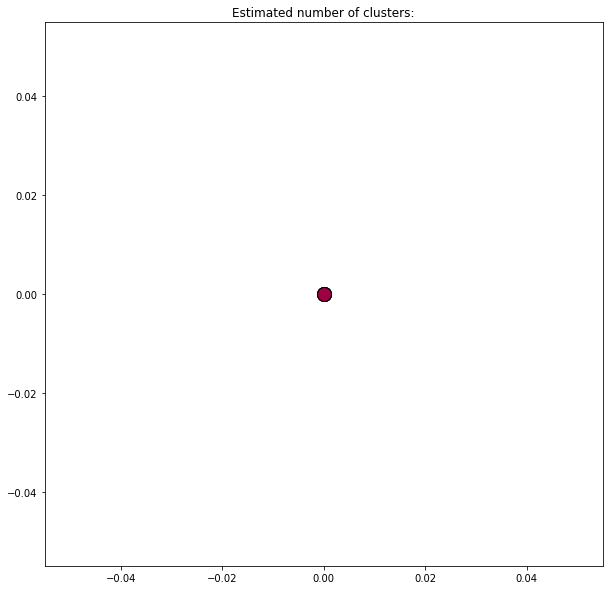

In [150]:
unique_labels = set(labels)
plt.figure(figsize=(10, 10))
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters:')
plt.show()